In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
import seaborn as sns

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
from sklearn.metrics import r2_score

In [8]:
from sklearn.preprocessing import StandardScaler

In [9]:
from sklearn.ensemble import RandomForestRegressor

In [10]:
df=pd.read_excel('Absenteeism_at_work.xls')


In [11]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype
---  ------                           --------------  -----
 0   ID                               740 non-null    int64
 1   Reason for absence               740 non-null    int64
 2   Month of absence                 740 non-null    int64
 3   Day of the week                  740 non-null    int64
 4   Seasons                          740 non-null    int64
 5   Transportation expense           740 non-null    int64
 6   Distance from Residence to Work  740 non-null    int64
 7   Service time                     740 non-null    int64
 8   Age                              740 non-null    int64
 9   Work load Average/day            740 non-null    int64
 10  Hit target                       740 non-null    int64
 11  Disciplinary failure             740 non-null    int64
 12  Education                        740 non-null    i

In [13]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

In [14]:
df.shape

(740, 21)

In [15]:
df.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [16]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271490.235135,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39058.116188,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205917.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244387.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264249.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294217.000000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378884.000000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transportation expense'>

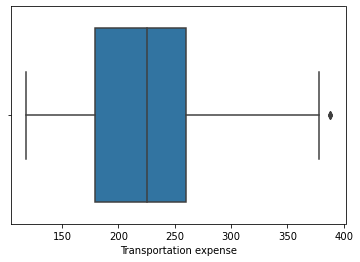

In [17]:
sns.boxplot(df['Transportation expense'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Work load Average/day '>

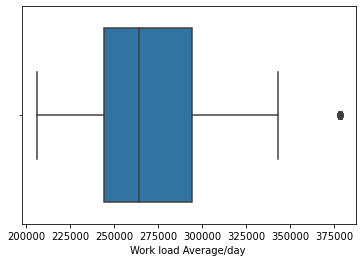

In [18]:
sns.boxplot(df['Work load Average/day '])

In [19]:
q1=df['Work load Average/day '].quantile(0.25)


In [20]:
q3=df['Work load Average/day '].quantile(0.75)

In [21]:
IQR=q3-q1

In [22]:
lower=q1-1.5*IQR

In [23]:
upper=q3+1.5*IQR

In [24]:
df=df[(df['Work load Average/day ']>lower) & (df['Work load Average/day ']<upper)]

In [25]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Weight'>

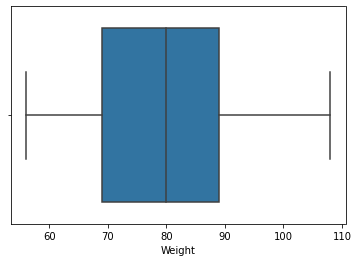

In [26]:
sns.boxplot(df['Weight'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Height'>

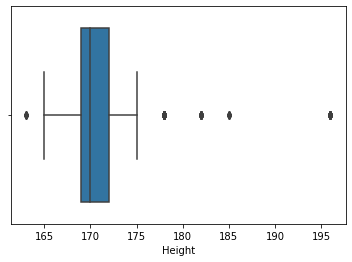

In [27]:
sns.boxplot(df['Height'])

In [28]:
q1=df['Height'].quantile(0.25)


In [29]:
q3=df['Height'].quantile(0.75)

In [30]:
IQR=q3-q1

In [31]:
lower=q1-1.5*IQR

In [32]:
upper=q3+1.5*IQR

In [33]:
df=df[(df['Height']>lower) & (df['Height']<upper)]

In [34]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Body mass index'>

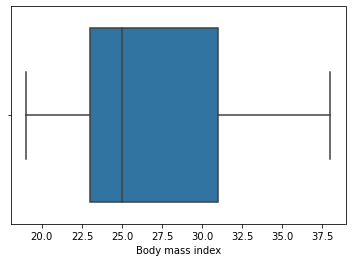

In [35]:
sns.boxplot(df['Body mass index'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Hit target'>

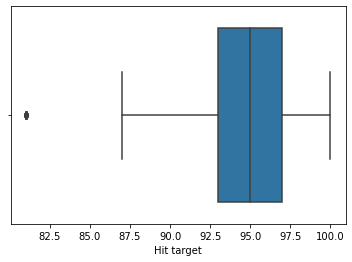

In [36]:
sns.boxplot(df['Hit target'])

In [37]:
q1=df['Hit target'].quantile(0.25)


In [38]:
q3=df['Hit target'].quantile(0.75)

In [39]:
IQR=q3-q1

In [40]:
lower=q1-1.5*IQR

In [41]:
upper=q3+1.5*IQR

In [42]:
df=df[(df['Hit target']>lower) & (df['Hit target']<upper)]

In [43]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Distance from Residence to Work'>

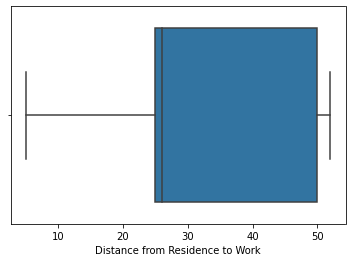

In [44]:
sns.boxplot(df['Distance from Residence to Work'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Service time'>

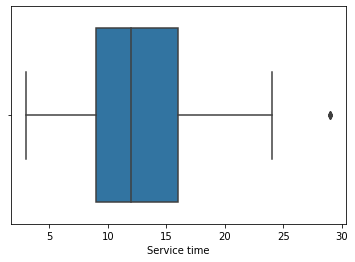

In [45]:
sns.boxplot(df['Service time'])

In [46]:
q1=df['Service time'].quantile(0.25)


In [47]:
q3=df['Service time'].quantile(0.75)

In [48]:
IQR=q3-q1

In [49]:
lower=q1-1.5*IQR

In [50]:
upper=q3+1.5*IQR

In [51]:
df=df[(df['Service time']>lower) & (df['Service time']<upper)]

In [52]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271219,...,0,1,2,1,0,2,100,170,35,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

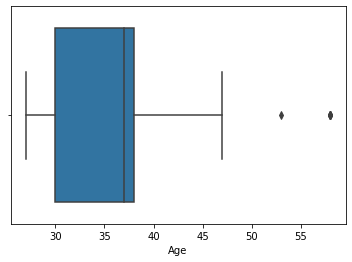

In [53]:
sns.boxplot(df['Age'])

In [54]:
q1=df['Age'].quantile(0.25)


In [55]:
q3=df['Age'].quantile(0.75)

In [56]:
IQR=q3-q1

In [57]:
lower=q1-1.5*IQR

In [58]:
upper=q3+1.5*IQR

In [59]:
df=df[(df['Age']>lower) & (df['Age']<upper)]

In [60]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Son'>

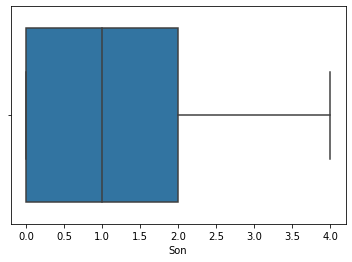

In [61]:
sns.boxplot(df['Son'])

In [62]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0


In [63]:
df.columns

Index(['ID', 'Reason for absence', 'Month of absence', 'Day of the week',
       'Seasons', 'Transportation expense', 'Distance from Residence to Work',
       'Service time', 'Age', 'Work load Average/day ', 'Hit target',
       'Disciplinary failure', 'Education', 'Son', 'Social drinker',
       'Social smoker', 'Pet', 'Weight', 'Height', 'Body mass index',
       'Absenteeism time in hours'],
      dtype='object')

<AxesSubplot:xlabel='Age', ylabel='Absenteeism time in hours'>

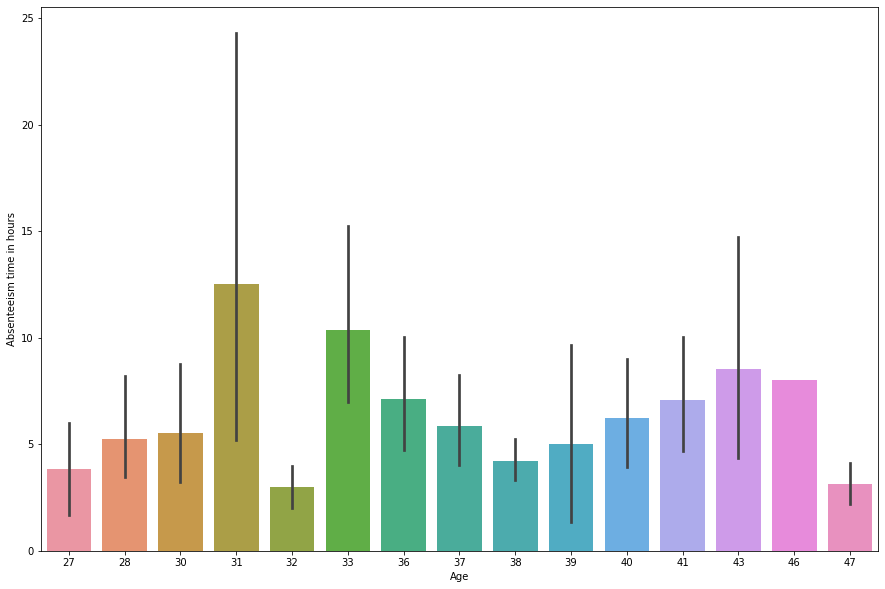

In [64]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Age'],y=df['Absenteeism time in hours'])

# Observations:
1. Average Absenteeism time in hours is maximum for age 31
2. Average Absenteeism time in hours is minimum for age 32

In [65]:
label_df=df.groupby('Age')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [66]:
val_df=df.groupby('Age')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


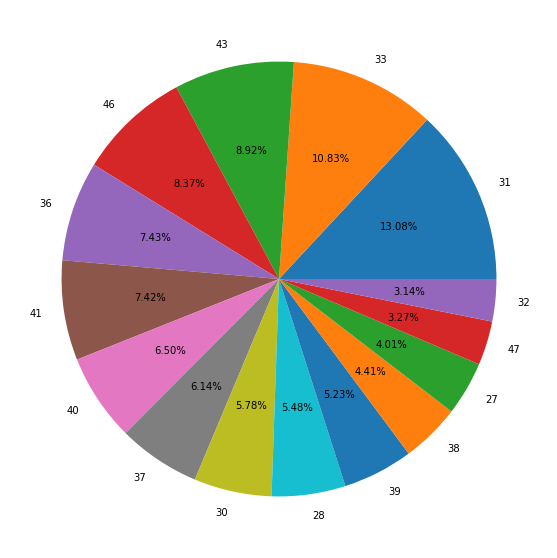

In [67]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Son', ylabel='Absenteeism time in hours'>

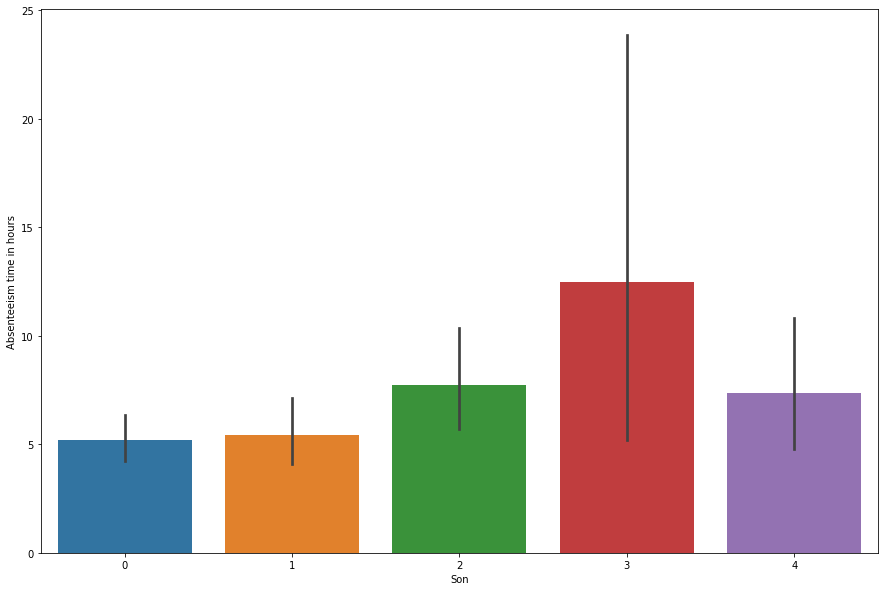

In [68]:
plt.figure(figsize=(15,10))
sns.barplot(x=df['Son'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with 3 son's have maximum Absenteeism time in hours'
2. Person with 0 son have minimum Absenteeism time in hours'

In [69]:
label_df=df.groupby('Son')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [70]:
val_df=df.groupby('Son')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


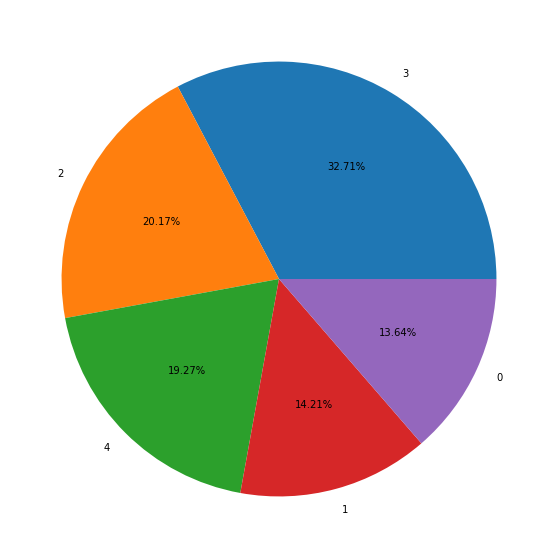

In [71]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Social drinker', ylabel='Absenteeism time in hours'>

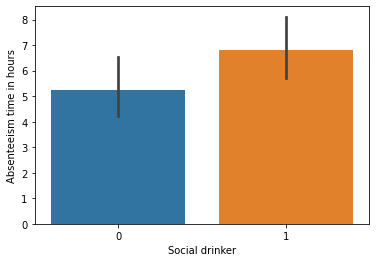

In [72]:
sns.barplot(x=df['Social drinker'],y=df['Absenteeism time in hours'])

# Observations:
1. Person who is social drinker with has maximum Absenteeism time in hours'
2. Person who is no social drinker with has minimum Absenteeism time in hours'

In [73]:
label_df=df.groupby('Social drinker')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [74]:
val_df=df.groupby('Social drinker')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


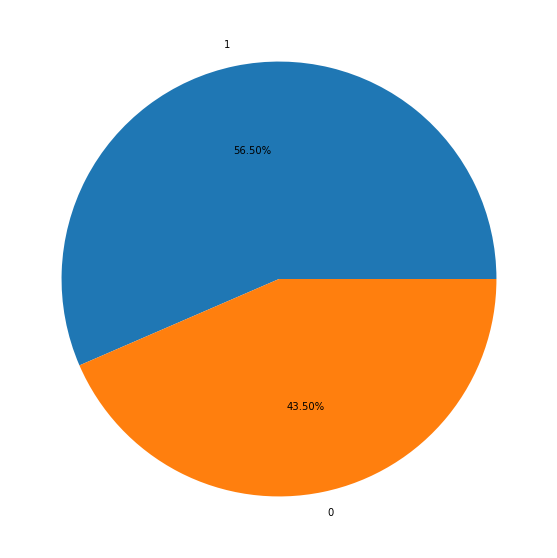

In [75]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Pet', ylabel='Absenteeism time in hours'>

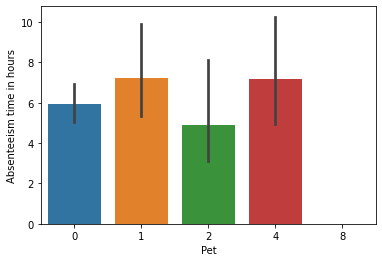

In [76]:
sns.barplot(x=df['Pet'],y=df['Absenteeism time in hours'])

# Observations:
1. Person having 1 Pet has maximum Absenteeism time in hours'
2. Person having 8 Pet has minimum Absenteeism time in hours'

In [77]:
label_df=df.groupby('Pet')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [78]:
val_df=df.groupby('Pet')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


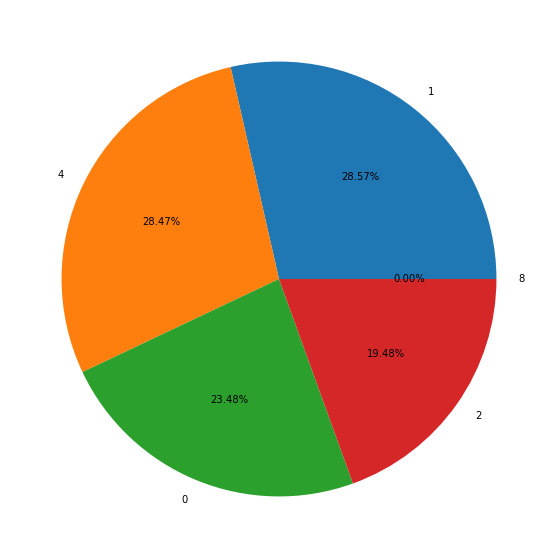

In [79]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Social smoker', ylabel='Absenteeism time in hours'>

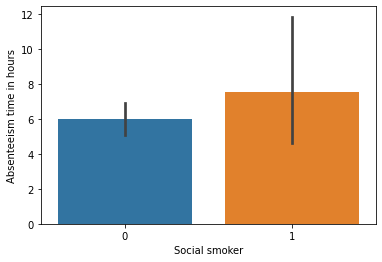

In [80]:
sns.barplot(x=df['Social smoker'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with no social smoker has maximum Absenteeism time in hours'
2. Person with social smoker has minimum Absenteeism time in hours'

In [81]:
label_df=df.groupby('Social smoker')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [82]:
val_df=df.groupby('Social smoker')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


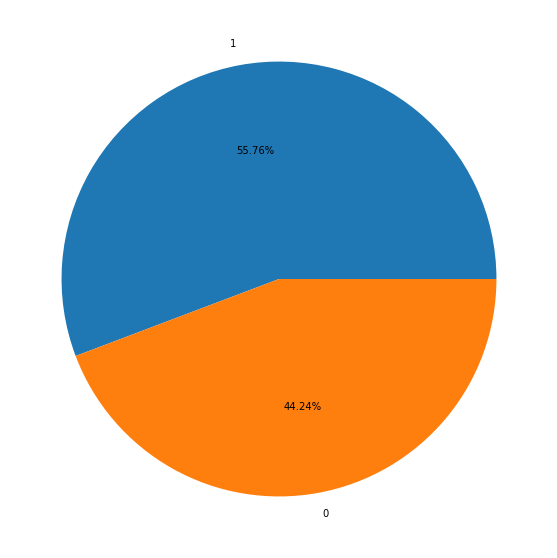

In [83]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Education', ylabel='Absenteeism time in hours'>

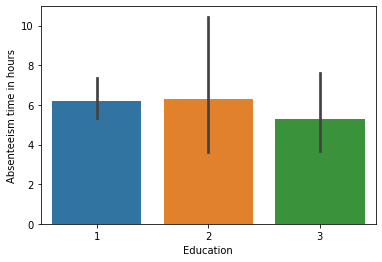

In [84]:
sns.barplot(x=df['Education'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Education 2 has maximum Absenteeism time in hours'
2. Person with Education 3 has minimum Absenteeism time in hours'

In [85]:
label_df=df.groupby('Education')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [86]:
val_df=df.groupby('Education')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


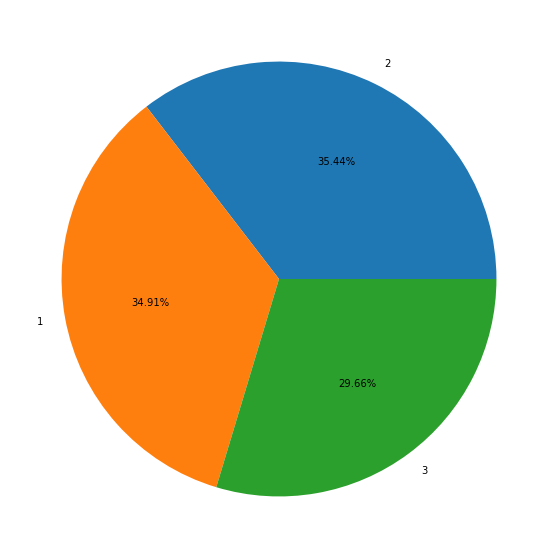

In [87]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Service time', ylabel='Absenteeism time in hours'>

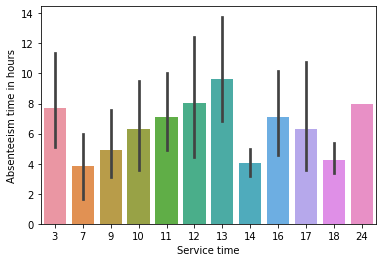

In [88]:
sns.barplot(x=df['Service time'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with service time 13 years has maximum Absenteeism time in hours'
2. Person with service time 7 years has minimum Absenteeism time in hours'

In [89]:
label_df=df.groupby('Service time')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [90]:
val_df=df.groupby('Service time')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


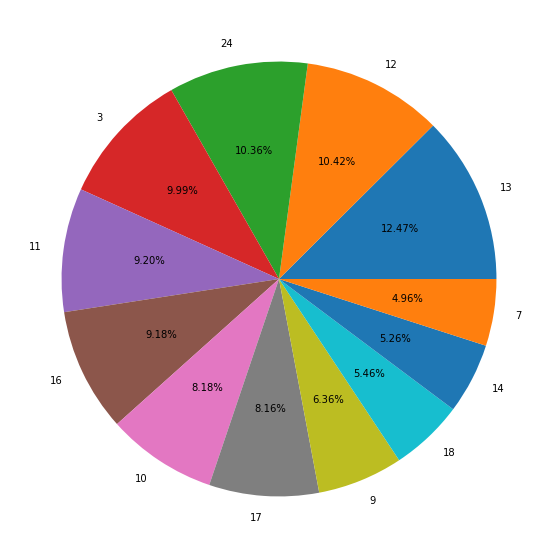

In [91]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Distance from Residence to Work', ylabel='Absenteeism time in hours'>

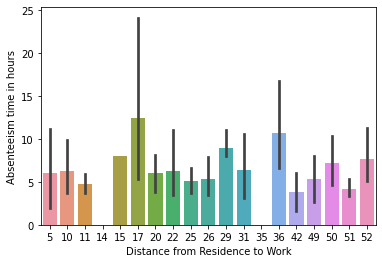

In [92]:
sns.barplot(x=df['Distance from Residence to Work'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Distance from Residence to Work 17 Kms has maximum Absenteeism time in hours'
2. Person with Distance from Residence to Work 14 and 35 Kms has minimum Absenteeism time in hours'

In [93]:
label_df=df.groupby('Distance from Residence to Work')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [94]:
val_df=df.groupby('Distance from Residence to Work')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


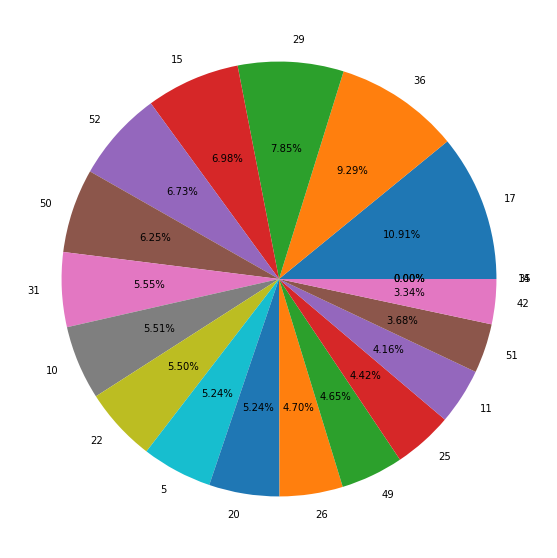

In [95]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

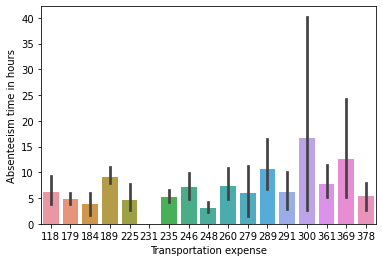

In [96]:
sns.barplot(x=df['Transportation expense'],y=df['Absenteeism time in hours'])
plt.show()

# Observations:
1. Person with Transportation expense 300 has maximum Absenteeism time in hours'
2. Person with Transportation expense 231 has minimum Absenteeism time in hours'


In [97]:
label_df=df.groupby('Transportation expense')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [98]:
val_df=df.groupby('Transportation expense')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


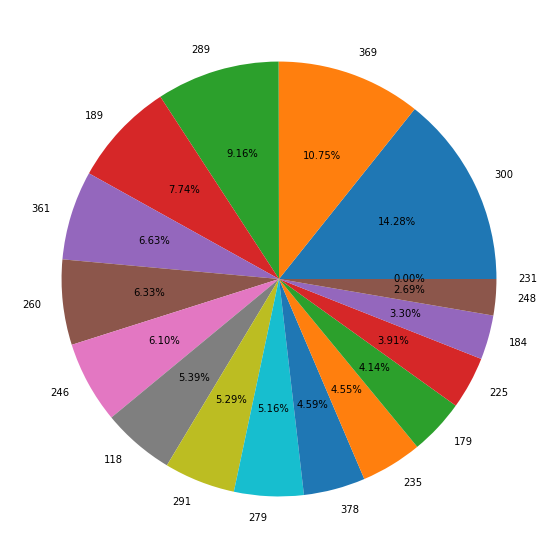

In [99]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Reason for absence', ylabel='Absenteeism time in hours'>

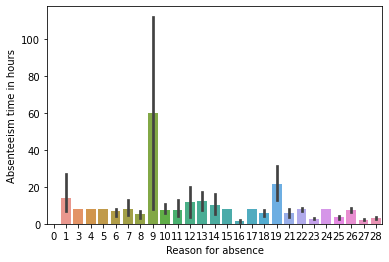

In [100]:
sns.barplot(x=df['Reason for absence'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Reason for absence 9 has maximum Absenteeism time in hours'
2. Person with Reason for absence 16 has minimum Absenteeism time in hours'

In [101]:
label_df=df.groupby("Reason for absence")['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [102]:
val_df=df.groupby('Reason for absence')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


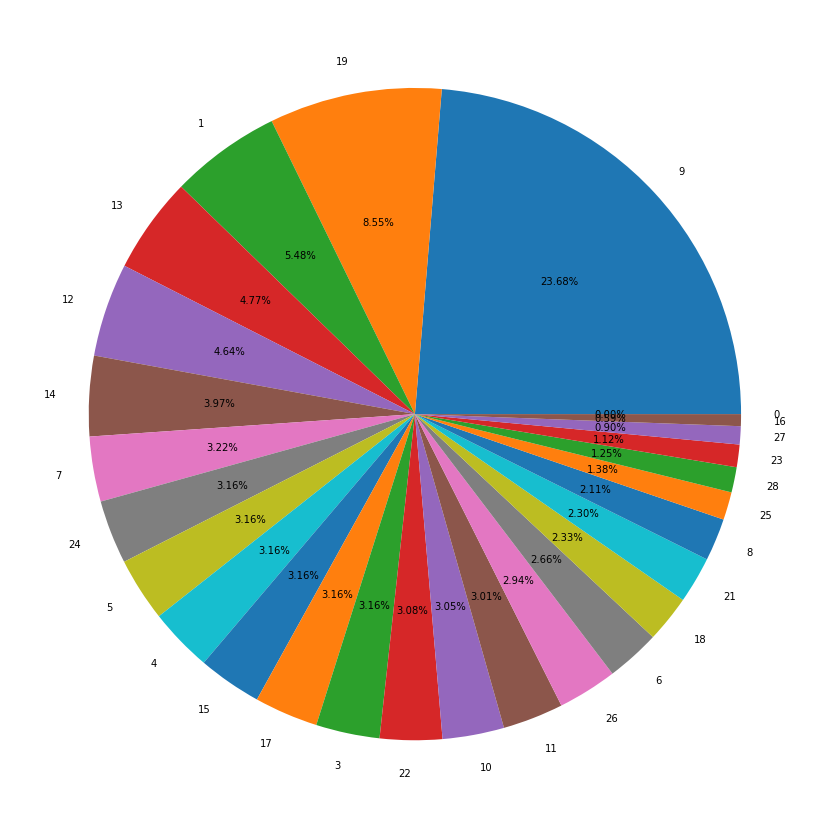

In [103]:
plt.figure(figsize=(15,15))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Month of absence', ylabel='Absenteeism time in hours'>

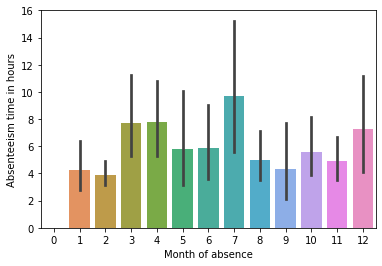

In [104]:
sns.barplot(x=df['Month of absence'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Month of absence 7 has maximum Absenteeism time in hours'
2. Person with Month of absence 0 has minimum Absenteeism time in hours'

In [105]:
label_df=df.groupby("Month of absence")['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [106]:
val_df=df.groupby('Month of absence')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


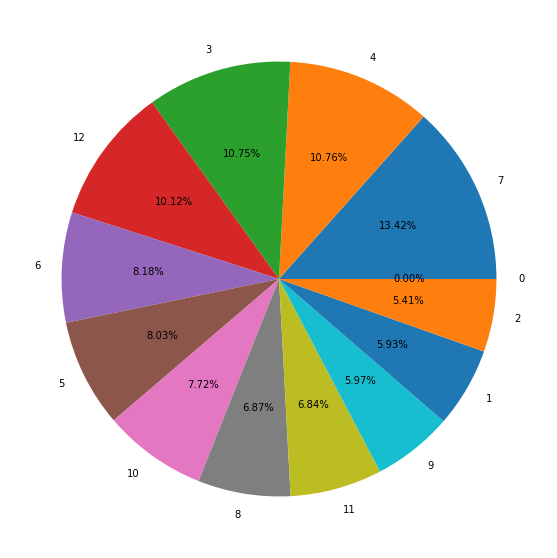

In [107]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Hit target', ylabel='Absenteeism time in hours'>

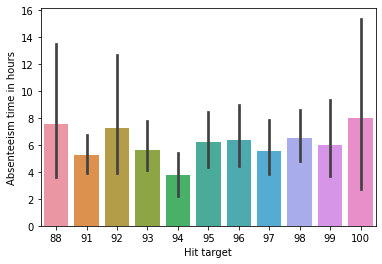

In [108]:
sns.barplot(x=df['Hit target'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Hit target 100 has maximum Absenteeism time in hours'
2. Person with Hit target 94 has minimum Absenteeism time in hours'

In [109]:
label_df=df.groupby("Hit target")['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [110]:
val_df=df.groupby('Hit target')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


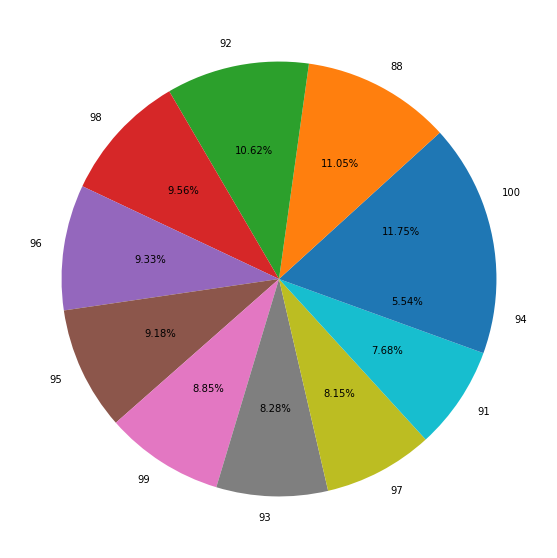

In [111]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Day of the week', ylabel='Absenteeism time in hours'>

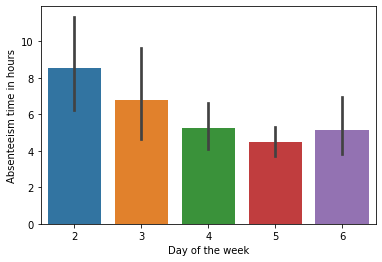

In [112]:
sns.barplot(x=df['Day of the week'],y=df['Absenteeism time in hours'])

# Observations:
1. Day of the week 2 maximum Absenteeism time in hours'
2. Day of the week 5 has minimum Absenteeism time in hours'

In [113]:
label_df=df.groupby("Day of the week")['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [114]:
val_df=df.groupby('Day of the week')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


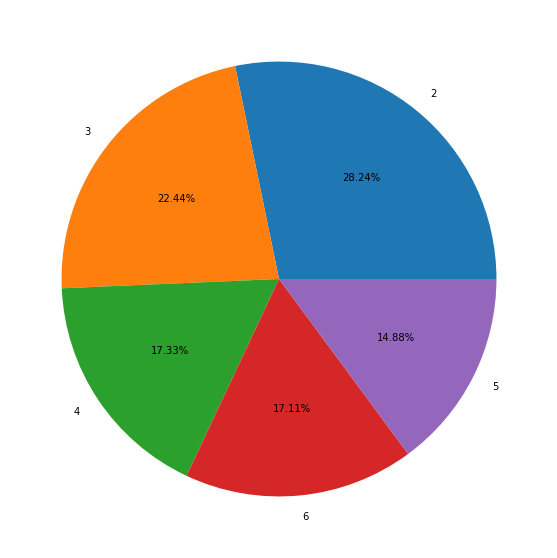

In [115]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Seasons', ylabel='Absenteeism time in hours'>

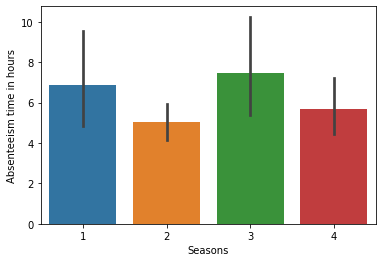

In [116]:
sns.barplot(x=df['Seasons'],y=df['Absenteeism time in hours'])

# Observations:
1. Seasons 3 has maximum Absenteeism time in hours'
2. Seasons 2 has minimum Absenteeism time in hours'

In [117]:
label_df=df.groupby("Seasons")['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [118]:
val_df=df.groupby('Seasons')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


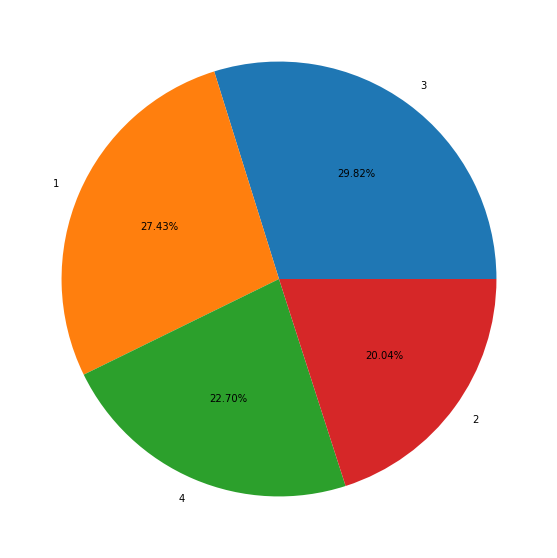

In [119]:
plt.figure(figsize=(10,10))
plt.pie(x=val_df,labels=label_df,autopct="%1.2f%%")
plt.show()

In [120]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,4
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239554,...,0,1,2,1,0,1,90,172,30,2
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,1,0,0,89,170,31,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,0,1,3,1,0,0,70,169,25,80
735,11,14,7,3,1,289,36,13,33,264604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271219,...,0,1,1,1,0,8,98,170,34,0


In [121]:
df['Absenteeism time in hours_range']=pd.qcut(df['Absenteeism time in hours'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_33944\789936783.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Absenteeism time in hours_range']=pd.qcut(df['Absenteeism time in hours'],5)


In [122]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours_range
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,"(3.0, 4.0]"
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,"(3.0, 4.0]"
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]"
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,1,3,1,0,0,70,169,25,80,"(8.0, 112.0]"
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]"
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,4,"(3.0, 4.0]"
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,"(-0.001, 2.0]"


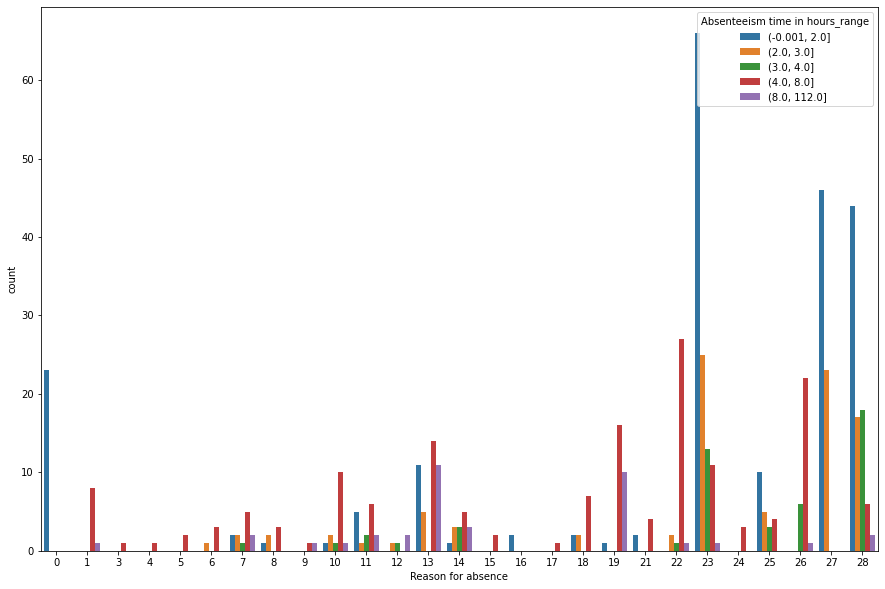

In [123]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Reason for absence'],hue=df['Absenteeism time in hours_range'])
plt.show()

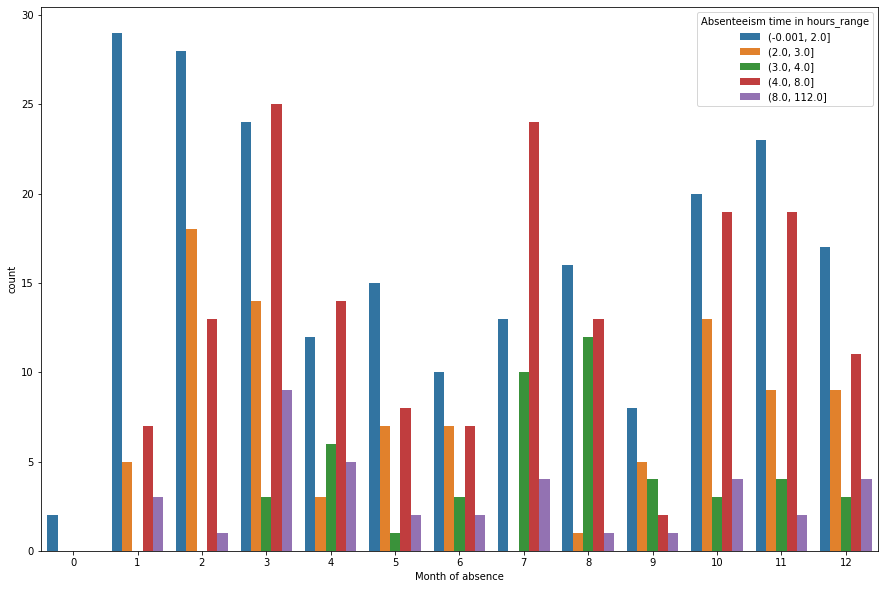

In [124]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Month of absence'],hue=df['Absenteeism time in hours_range'])
plt.show()

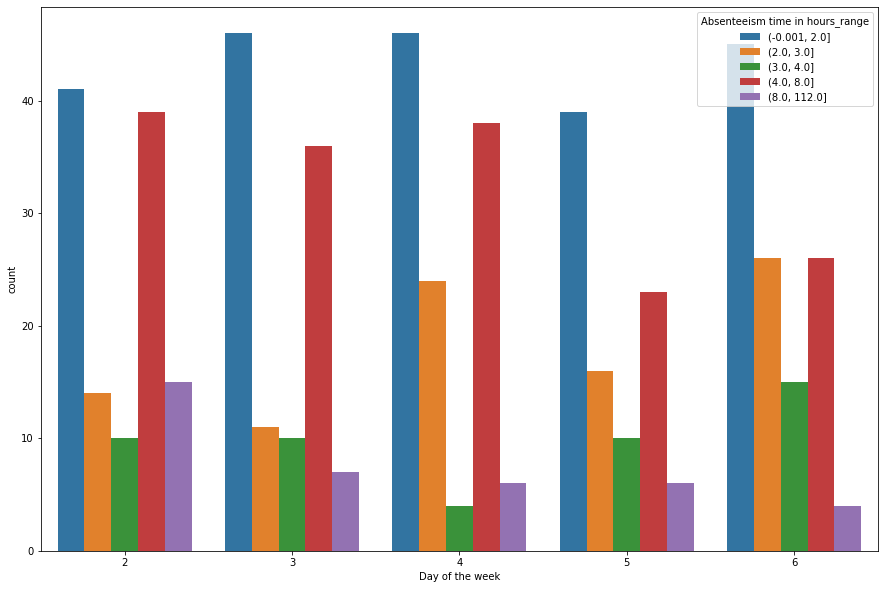

In [125]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Day of the week'],hue=df['Absenteeism time in hours_range'])
plt.show()

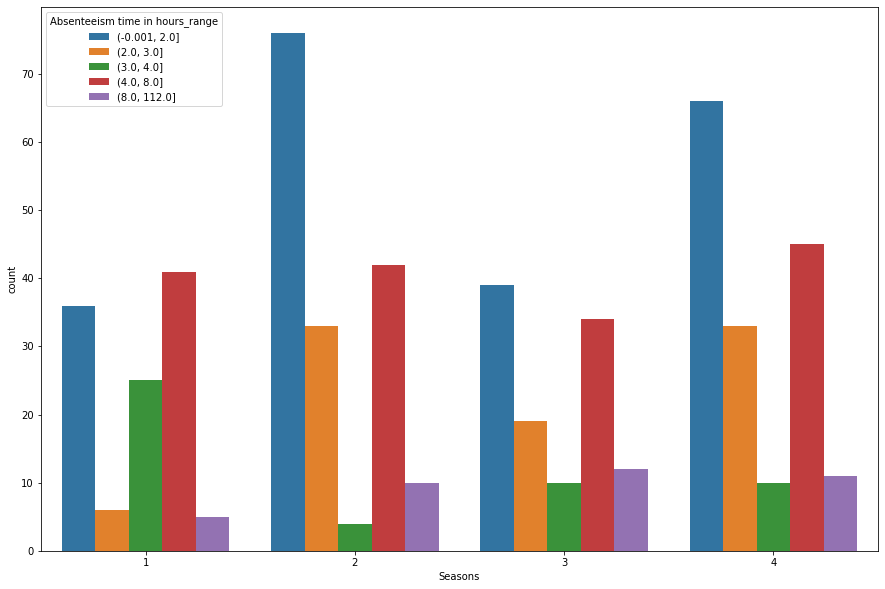

In [126]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Seasons'],hue=df['Absenteeism time in hours_range'])
plt.show()

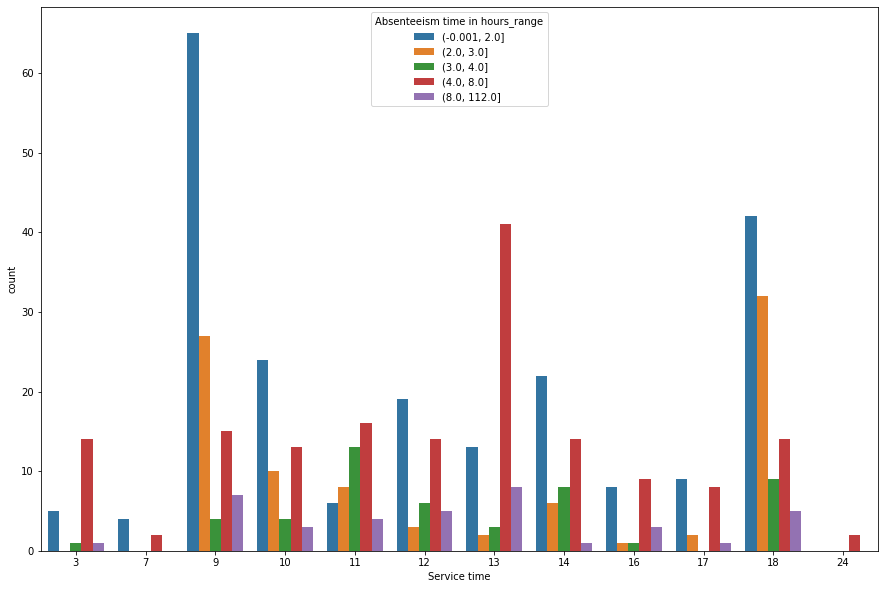

In [127]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Service time'],hue=df['Absenteeism time in hours_range'])
plt.show()

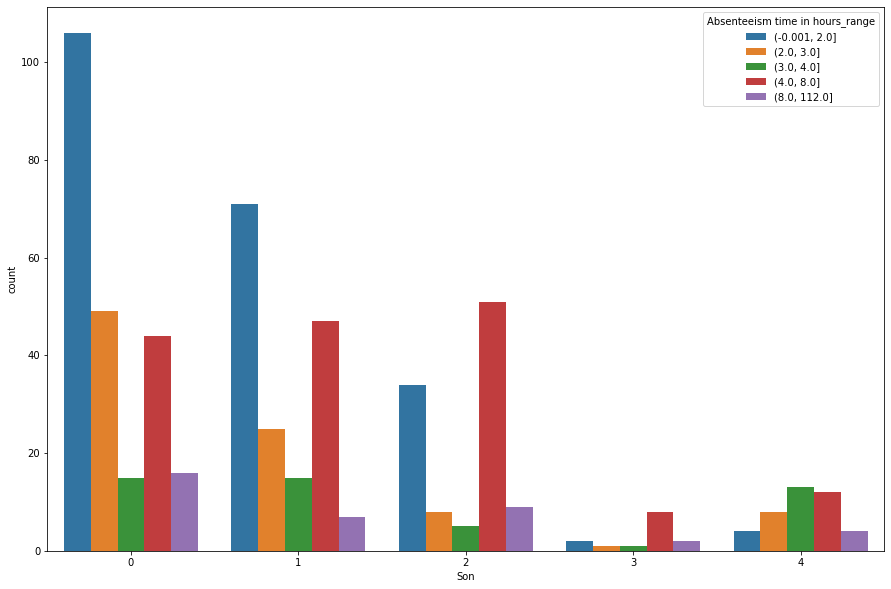

In [128]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Son'],hue=df['Absenteeism time in hours_range'])
plt.show()

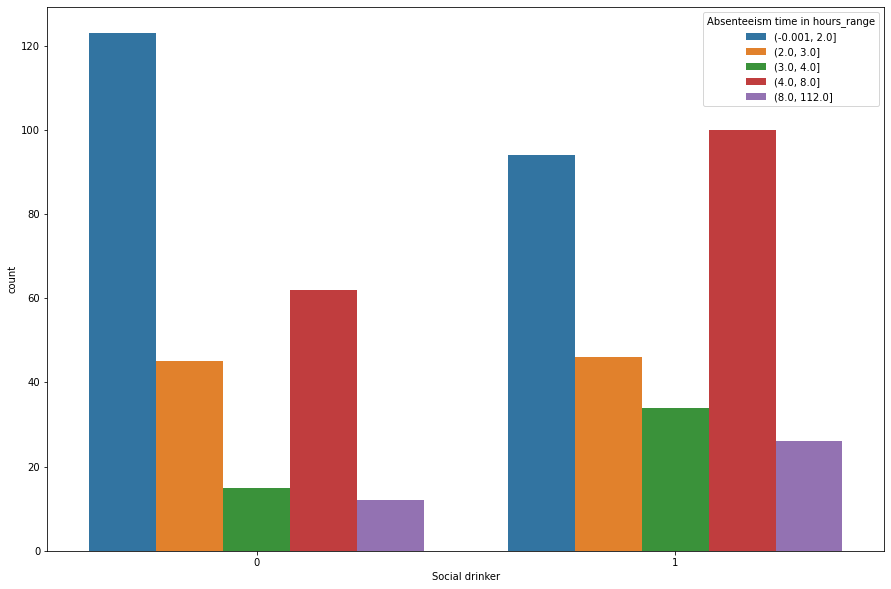

In [129]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Social drinker'],hue=df['Absenteeism time in hours_range'])
plt.show()

# Observations:
1. Person with no Social drinker has maximum Absenteeism time in hours from 0.001 and 2.
2. Person with  Social drinker has maximum Absenteeism time in hours from 2 and 3.
3. Person with  Social drinker has maximum Absenteeism time in hours from 4 and 8.
4. Person with  Social drinker has maximum Absenteeism time in hours from 3 and 4.
5. Person with  Social drinker has maximum Absenteeism time in hours from 8 and 112.



In [130]:
label_df=df.groupby('Social drinker')['Absenteeism time in hours_range'].value_counts().sort_values(ascending=False).index


In [131]:
value_df=df.groupby('Social drinker')['Absenteeism time in hours_range'].value_counts().sort_values(ascending=False).values


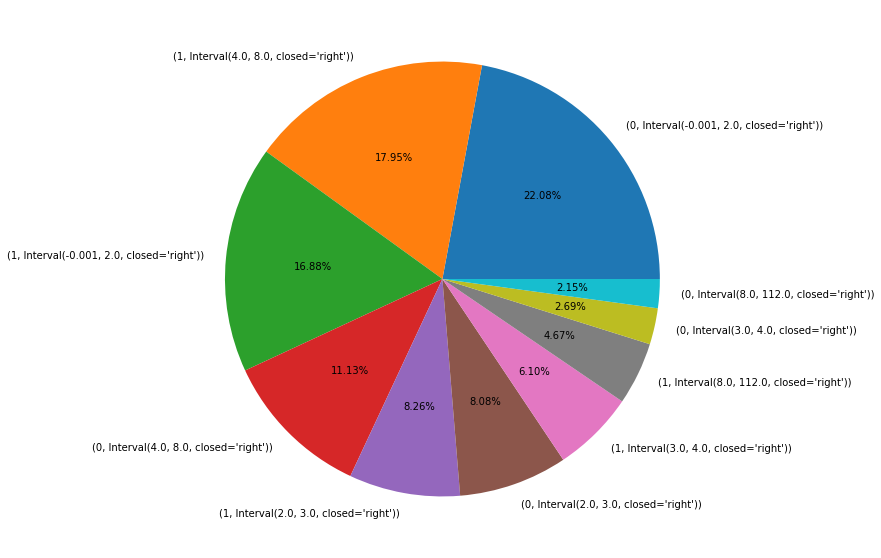

In [132]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

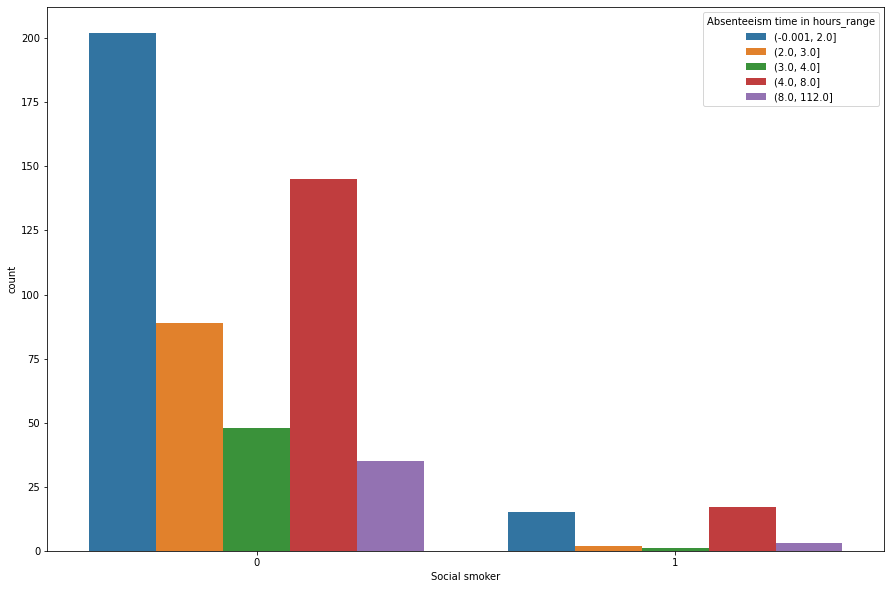

In [133]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Social smoker'],hue=df['Absenteeism time in hours_range'])
plt.show()

# Observations:
1. Person with no Social smoker has maximum Absenteeism time in hours.

In [134]:
label_df=df.groupby('Social smoker')['Absenteeism time in hours_range'].value_counts().sort_values(ascending=False).index


In [135]:
value_df=df.groupby('Social smoker')['Absenteeism time in hours_range'].value_counts().sort_values(ascending=False).values


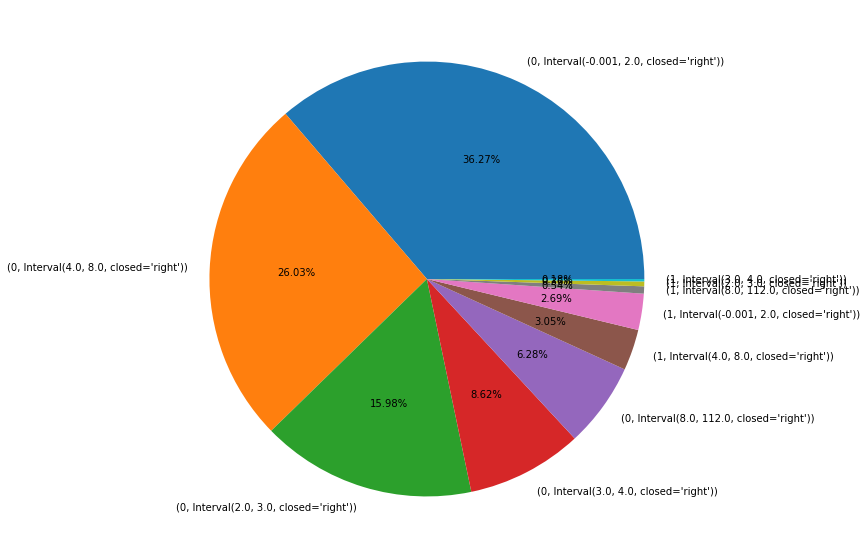

In [136]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

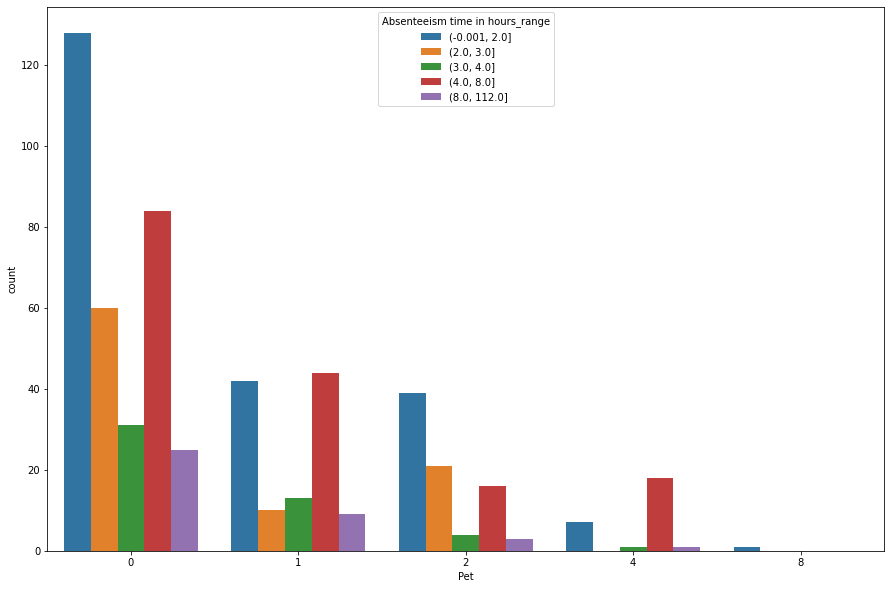

In [137]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Pet'],hue=df['Absenteeism time in hours_range'])
plt.show()

# Observations:
1. Person with Pet 0 has maximum Absenteeism time in hours' from 0.001 and 2 hours.
2. Person with Pet 0 has maximum Absenteeism time in hours' from 4.0 and 8.0 hours.
3. Person with Pet 0 has maximum Absenteeism time in hours' from 2.0 and 3.0 hours.
4. Person with Pet 0 has maximum Absenteeism time in hours' from 3.0 and 4.0 hours.
5. Person with Pet 0 has maximum Absenteeism time in hours' from 8.0 and 112.0 hours.







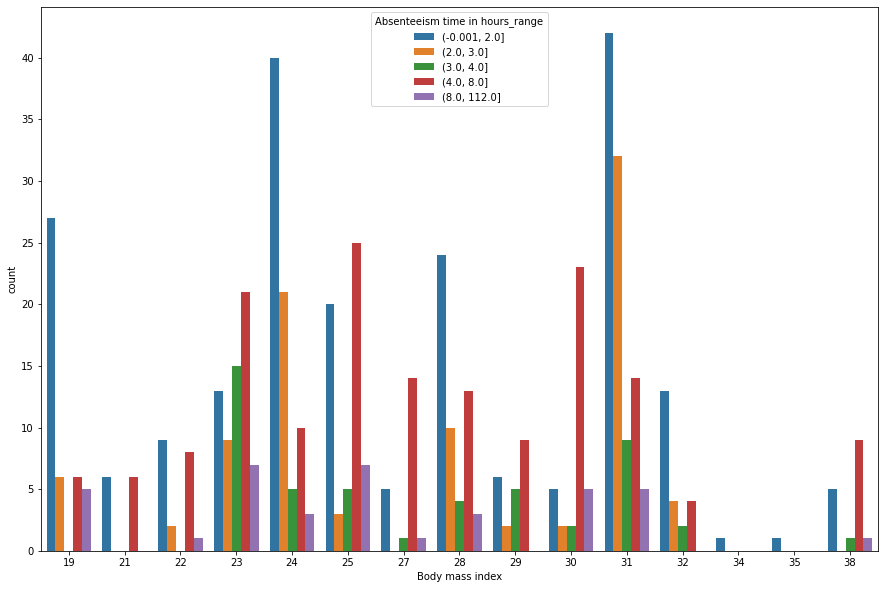

In [138]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Body mass index'],hue=df['Absenteeism time in hours_range'])
plt.show()

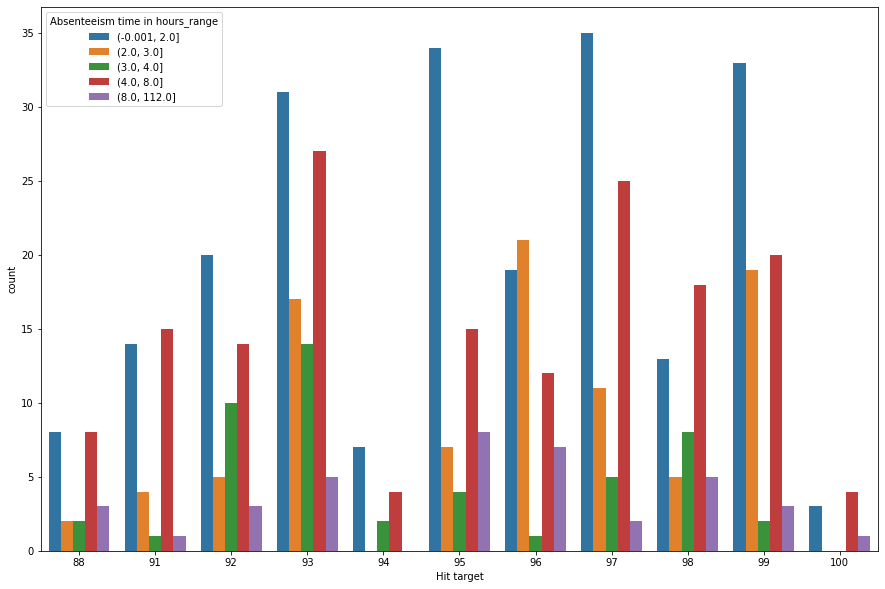

In [139]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Hit target'],hue=df['Absenteeism time in hours_range'])
plt.show()

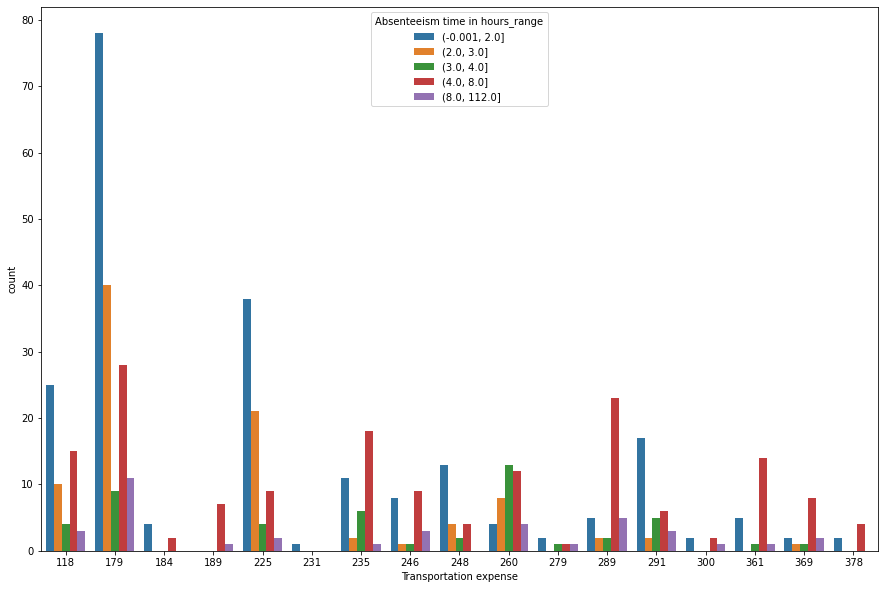

In [140]:
plt.figure(figsize=(15,10))
sns.countplot(x=df['Transportation expense'],hue=df['Absenteeism time in hours_range'])
plt.show()

# Observations:
1. Absenteeism time in hours' from 0.001 and 2 hours is maximum for Transportation expense 179.
2. Absenteeism time in hours' from 2 and 3 hours is maximum for Transportation expense 179.
3. Absenteeism time in hours' from 4 and 8 hours is maximum for Transportation expense 179.
4. Absenteeism time in hours' from 3 and 4 hours is maximum for Transportation expense 260.
5. Absenteeism time in hours' from 8 and 112 hours is maximum for Transportation expense 179.




In [141]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours_range
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,"(3.0, 4.0]"
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,"(3.0, 4.0]"
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]"
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,1,3,1,0,0,70,169,25,80,"(8.0, 112.0]"
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]"
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,4,"(3.0, 4.0]"
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,"(-0.001, 2.0]"


<AxesSubplot:xlabel='Absenteeism time in hours_range', ylabel='Age'>

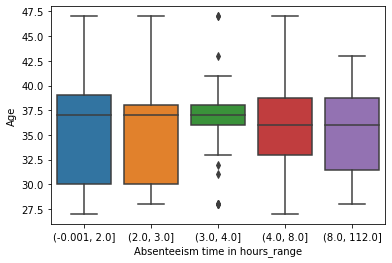

In [142]:
sns.boxplot(x=df['Absenteeism time in hours_range'],y=df['Age'])

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

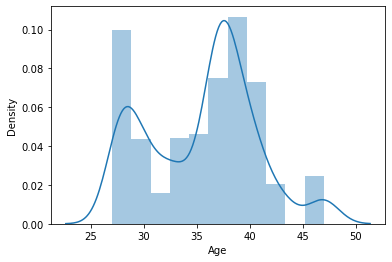

In [143]:
sns.distplot(df['Age'])

# Observations:
1. Maximum Age of person is between 35 and 40 years

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Height', ylabel='Density'>

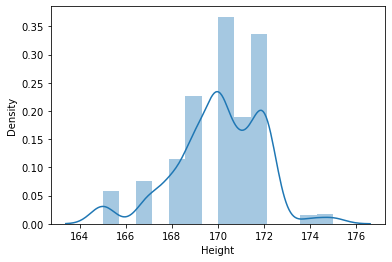

In [144]:
sns.distplot(df['Height'])

# Observations:
1. Maximum Height of person is between 168 and 170 years

C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Body mass index', ylabel='Density'>

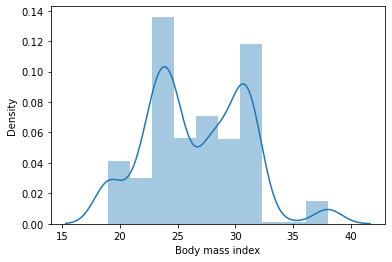

In [145]:
sns.distplot(df['Body mass index'])

# Observations:
1. Body mass index of maximum person is between 20 and 25

In [146]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours_range
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,"(3.0, 4.0]"
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,"(3.0, 4.0]"
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]"
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,1,3,1,0,0,70,169,25,80,"(8.0, 112.0]"
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]"
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,4,"(3.0, 4.0]"
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,"(-0.001, 2.0]"


C:\Users\himanshu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Transportation expense', ylabel='Density'>

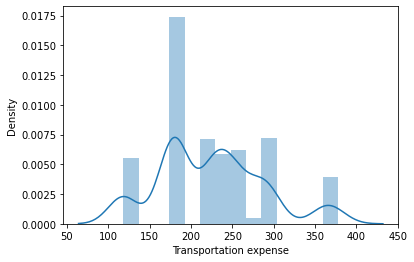

In [147]:
sns.distplot(df['Transportation expense'])

# Observations:
1. Maximum Transportation expense for persons is between 150 and 200

In [148]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours_range
0,11,26,7,3,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,4,"(3.0, 4.0]"
2,3,23,7,4,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
3,7,7,7,5,1,279,5,14,39,239554,...,1,2,1,1,0,68,168,24,4,"(3.0, 4.0]"
4,11,23,7,5,1,289,36,13,33,239554,...,1,2,1,0,1,90,172,30,2,"(-0.001, 2.0]"
5,3,23,7,6,1,179,51,18,38,239554,...,1,0,1,0,0,89,170,31,2,"(-0.001, 2.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,1,3,1,0,0,70,169,25,80,"(8.0, 112.0]"
735,11,14,7,3,1,289,36,13,33,264604,...,1,2,1,0,1,90,172,30,8,"(4.0, 8.0]"
736,1,11,7,3,1,235,11,14,37,264604,...,3,1,0,0,1,88,172,29,4,"(3.0, 4.0]"
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,1,0,8,98,170,34,0,"(-0.001, 2.0]"


<AxesSubplot:xlabel='Age', ylabel='Service time'>

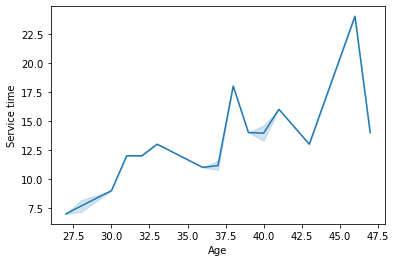

In [149]:
sns.lineplot(x=df['Age'],y=df['Service time'])

# Observations:
1. Person at Age 45 years has maximum Servie time
2. Person Age less than 27.5 years has minimum Servie time


In [150]:
df['Age_range']=pd.qcut(df['Age'],5)


C:\Users\himanshu\AppData\Local\Temp\ipykernel_33944\3871056640.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age_range']=pd.qcut(df['Age'],5)


In [151]:
df

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,Absenteeism time in hours_range,Age_range
0,11,26,7,3,1,289,36,13,33,239554,...,2,1,0,1,90,172,30,4,"(3.0, 4.0]","(30.0, 36.0]"
2,3,23,7,4,1,179,51,18,38,239554,...,0,1,0,0,89,170,31,2,"(-0.001, 2.0]","(36.0, 38.0]"
3,7,7,7,5,1,279,5,14,39,239554,...,2,1,1,0,68,168,24,4,"(3.0, 4.0]","(38.0, 40.0]"
4,11,23,7,5,1,289,36,13,33,239554,...,2,1,0,1,90,172,30,2,"(-0.001, 2.0]","(30.0, 36.0]"
5,3,23,7,6,1,179,51,18,38,239554,...,0,1,0,0,89,170,31,2,"(-0.001, 2.0]","(36.0, 38.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
734,13,13,7,2,1,369,17,12,31,264604,...,3,1,0,0,70,169,25,80,"(8.0, 112.0]","(30.0, 36.0]"
735,11,14,7,3,1,289,36,13,33,264604,...,2,1,0,1,90,172,30,8,"(4.0, 8.0]","(30.0, 36.0]"
736,1,11,7,3,1,235,11,14,37,264604,...,1,0,0,1,88,172,29,4,"(3.0, 4.0]","(36.0, 38.0]"
737,4,0,0,3,1,118,14,13,40,271219,...,1,1,0,8,98,170,34,0,"(-0.001, 2.0]","(38.0, 40.0]"


<AxesSubplot:xlabel='Age_range', ylabel='Absenteeism time in hours'>

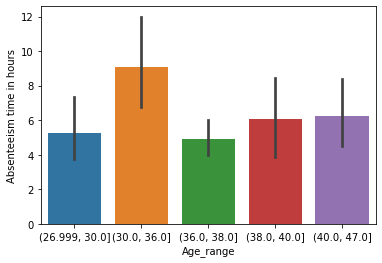

In [152]:
sns.barplot(x=df['Age_range'],y=df['Absenteeism time in hours'])

# Observations:
1. Person with Age range 30 and 36 years has maximum Servie time
2. Person with Age range 36 and 38 years has minimum Servie time


In [153]:
label_df=df.groupby('Age_range')['Absenteeism time in hours'].mean().sort_values(ascending=False).index


In [154]:
value_df=df.groupby('Age_range')['Absenteeism time in hours'].mean().sort_values(ascending=False).values


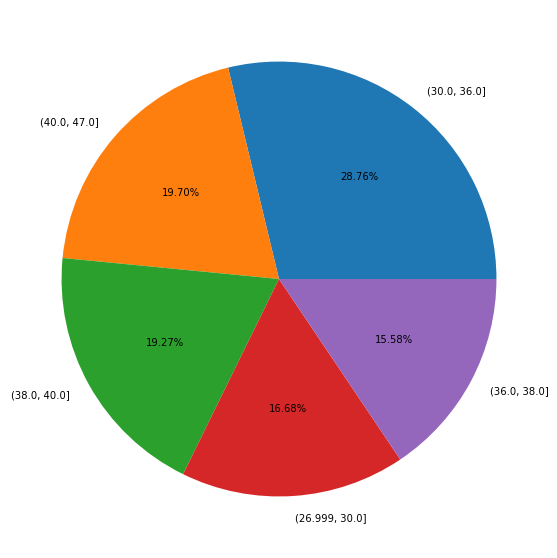

In [155]:
plt.figure(figsize=(15,10))
plt.pie(x=value_df,labels=label_df,autopct="%1.2f%%")
plt.show()

<AxesSubplot:xlabel='Age_range', ylabel='Absenteeism time in hours'>

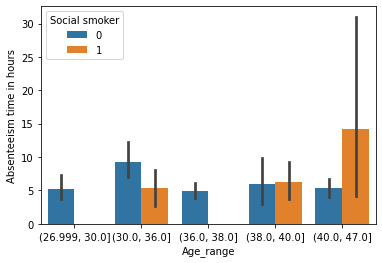

In [156]:
sns.barplot(x=df['Age_range'],y=df['Absenteeism time in hours'],hue=df['Social smoker'])

# Observations:
1. Person who is social smoker with Age range 40 and 47 years has maximum Absenteeisum time in hours.
2. Person who is don't social smoker with Age range 30 and 36 years has maximum Absenteeisum time in hours.


<AxesSubplot:xlabel='Age_range', ylabel='Absenteeism time in hours'>

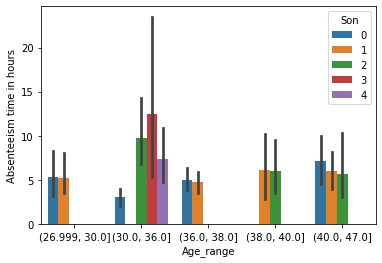

In [157]:
sns.barplot(x=df['Age_range'],y=df['Absenteeism time in hours'],hue=df['Son'])

# Observations:
1. Person who is social drinker and non-social drinker with Age range 30 and 36 years has maximum Absenteeisum time in hours.

<AxesSubplot:xlabel='Age_range', ylabel='Absenteeism time in hours'>

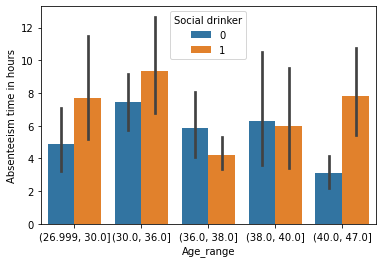

In [158]:
sns.barplot(x=df['Age_range'],y=df['Absenteeism time in hours'],hue=df['Social drinker'])

# Observations:
1. Person who is social drinker and non-social drinker with Age range 30 and 36 years has maximum Absenteeisum time in hours.

<AxesSubplot:xlabel='Age_range', ylabel='Absenteeism time in hours'>

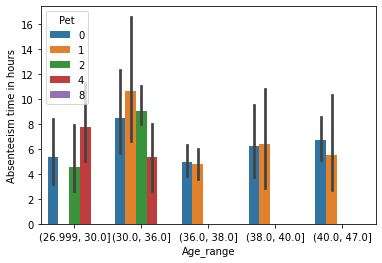

In [159]:
sns.barplot(x=df['Age_range'],y=df['Absenteeism time in hours'],hue=df['Pet'])

# Observations:
1. Person who is social drinker and non-social drinker with Age range 30 and 36 years has maximum Absenteeisum time in hours.